In [1]:
import os, sys, time, glob, warnings
from os.path import join as joindir
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors
import numpy as np, pandas as pd, xarray as xr
from numpy import datetime64 as dt64, timedelta64 as td64

warnings.filterwarnings('ignore')

def doy(theDatetime): return 1 + int((theDatetime - dt64(str(theDatetime)[0:4] + '-01-01')) / td64(1, 'D'))
def dt64_from_doy(year, doy): return dt64(str(year) + '-01-01') + td64(doy-1, 'D')
def day_of_month_to_string(d): return str(d) if d > 9 else '0' + str(d)

print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))


Jupyter Notebook running Python 3


In [25]:
s=xr.open_dataset("../data/roms_osb_july_2021.nc")
s

<xarray.Dataset>
Dimensions:        (ocean_time: 745, s_w: 31, s_rho: 30)
Coordinates:
    lat_rho        float64 ...
    lat_u          float64 ...
    lat_v          float64 ...
    lon_rho        float64 ...
    lon_u          float64 ...
    lon_v          float64 ...
  * ocean_time     (ocean_time) datetime64[ns] 2021-07-01 ... 2021-08-01
  * s_rho          (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w            (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
Data variables: (12/38)
    AKs            (ocean_time, s_w) float32 ...
    AKv            (ocean_time, s_w) float32 ...
    Cs_r           (s_rho) float64 ...
    Cs_w           (s_w) float64 ...
    Ldetritus      (ocean_time, s_rho) float32 ...
    NO3            (ocean_time, s_rho) float32 ...
    ...             ...
    vbar           (ocean_time) float32 ...
    w              (ocean_time, s_w) float32 ...
    zeta           (ocean_time) float32 ...
    zooplankton    (ocean_time, s_rho) float32 ...
    z_rho          (ocean_time, s_rho) float64 ...
    z_w            (ocean_time, s_w) float64 ...
Attributes: (12/43)
    file:                   /gscratch/macc/parker/LiveOcean_roms/output/cas6_...
    format:                 netCDF-4
    Conventions:            CF-1.4, SGRID-0.3
    type:                   ROMS/TOMS history file
    title:                  First LiveOcean input file
    var_info:               /gscratch/macc/parker/LiveOcean_roms/LO_ROMS/ROMS...
    ...                     ...
    ana_file:               ROMS/Functionals/ana_btflux.h, ROMS/Functionals/a...
    bio_file:               ROMS/Nonlinear/Biology/npzd2o_banas.h
    CPP_options:            LO8B, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSFLU...
    NCO:                    netCDF Operators version 4.9.8 (Homepage = http:/...
    nco_input_file_number:  8761
    nco_input_file_list:    moor_temp_000000.nc moor_temp_000001.nc moor_temp...

```
Coordinates:
lat_rho
lat_u
lat_v
lon_rho
lon_u
lon_v
ocean_time(ocean_time)                   Also a dimension
s_rho(s_rho)                             Also a dimension
s_w(s_w)                                 Also a dimension


Data variable                            Guess or Solid Guess: Interpretation
AKs(ocean_time, s_rho)
AKv(ocean_time, s_rho)
Cs_r(s_rho)
Cs_w(s_w)
Ldetritus(ocean_time, s_rho)
NO3(ocean_time, s_rho)                   Nitrate: Cell centers
Pair(ocean_time)
TIC(ocean_time, s_rho)                   Total Inorganic Carbon: Cell centers
                                         Might relate to FDOM and backscatter
Uwind(ocean_time)                        Sea surface windspeed
Vwind(ocean_time)
alkalinity(ocean_time, s_rho)            pH
bustr(ocean_time)
bvstr(ocean_time)
detritus(ocean_time, s_rho)              Detritus: Would relate to FDOM
h()
hc()
latent(ocean_time)                       Latent heat (entire water column?)
lwrad(ocean_time)
oxygen(ocean_time, s_rho)                Dissolved oxygen: Cell centers
phytoplankton(ocean_time, s_rho)         Phytoplankton concentration: Cell centers
                                         Would relate to chlor-a
rho(ocean_time, s_rho)                   Density?
salt(ocean_time, s_rho)                  Salinity
sensible(ocean_time)                     Sensible heat?
shflux(ocean_time)
ssflux(ocean_time)
sustr(ocean_time)
svstr(ocean_time)
swrad(ocean_time)
temp(ocean_time, s_rho)                  Temperature
u(ocean_time, s_rho)                     u and v are momenta along grid axes
ubar(ocean_time)
v(ocean_time, s_rho)
vbar(ocean_time)
w(ocean_time, s_w)
zeta(ocean_time)
zooplankton(ocean_time, s_rho)           Zooplankton: Cell centers
z_rho(ocean_time, s_rho)                 Depths: Model cell center depths 'rho'
z_w(ocean_time, s_w)                     Depths: Model cell boundary depths 'w'
```

In [23]:
s.u

<xarray.DataArray 'u' (ocean_time: 745, s_rho: 30)>
array([[ 0.013336,  0.009489,  0.004758, ..., -0.292521, -0.303158, -0.312358],
       [ 0.002839,  0.001103, -0.004095, ..., -0.294848, -0.309893, -0.286027],
       [ 0.002854,  0.002375, -0.005017, ..., -0.277614, -0.306644, -0.26111 ],
       ...,
       [ 0.013008, -0.014713, -0.006954, ...,  0.016736, -0.106329, -0.09576 ],
       [ 0.003122, -0.024321, -0.015842, ..., -0.024428, -0.139663, -0.132761],
       [-0.003762, -0.027326, -0.018905, ..., -0.058624, -0.167528, -0.158553]],
      dtype=float32)
Coordinates:
    lat_rho     float64 44.53
    lat_u       float64 44.53
    lat_v       float64 44.54
    lon_rho     float64 -125.4
    lon_u       float64 -125.4
    lon_v       float64 -125.4
  * ocean_time  (ocean_time) datetime64[ns] 2021-07-01 ... 2021-08-01
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
Attributes:
    long_name:     u-momentum component
    units:         meter second-1
    time:          ocean_time
    grid:          grid
    location:      edge1
    field:         u-velocity, scalar, series
    cell_methods:  ocean_time: mean

In [19]:
s=s.sel(ocean_time=slice(dt64('2021-07-01'), dt64('2021-08-01')))

In [20]:
# s.to_netcdf('roms_osb_july_2021.nc')

In [11]:
print(s.data_vars)

Data variables: (12/38)
    AKs            (ocean_time, s_w) float32 5e-06 0.001239 ... 0.01189 5e-06
    AKv            (ocean_time, s_w) float32 1.738e-05 0.002809 ... 9.478e-05
    Cs_r           (s_rho) float64 -0.9776 -0.9285 ... -0.001763 -0.0001954
    Cs_w           (s_w) float64 -1.0 -0.9537 -0.9022 ... -0.0007824 0.0
    Ldetritus      (ocean_time, s_rho) float32 0.0007181 0.0008384 ... 0.0006232
    NO3            (ocean_time, s_rho) float32 41.45 41.49 ... 0.05812 0.05661
    ...             ...
    vbar           (ocean_time) float32 0.0111 0.004242 ... 0.01689 0.01129
    w              (ocean_time, s_w) float32 4.521e-05 0.0003866 ... 9.617e-05
    zeta           (ocean_time) float32 0.4945 0.8625 1.039 ... 0.2078 0.5595
    zooplankton    (ocean_time, s_rho) float32 0.00117 0.001174 ... 0.1602
    z_rho          (ocean_time, s_rho) float64 -2.871e+03 -2.727e+03 ... -0.1787
    z_w            (ocean_time, s_w) float64 -2.937e+03 -2.801e+03 ... 0.5595


In [14]:
s=s.drop('Cs_r')
s=s.drop('Cs_w')
s=s.drop('Ldetritus')
s=s.drop('NO3')
s=s.drop('Pair')
s=s.drop('TIC')

print(s.data_vars)

Data variables: (12/30)
    Uwind          (ocean_time) float32 3.781 5.515 5.424 ... 3.308 2.293 2.914
    Vwind          (ocean_time) float32 -4.886 -6.296 -6.788 ... -7.537 -8.277
    alkalinity     (ocean_time, s_rho) float32 2.496e+03 2.495e+03 ... 2.294e+03
    bustr          (ocean_time) float32 -0.0009834 -0.000235 ... 0.0002323
    bvstr          (ocean_time) float32 -0.001358 -0.00179 ... 0.0007138
    detritus       (ocean_time, s_rho) float32 4.26e-06 4.529e-06 ... 0.3807
    ...             ...
    vbar           (ocean_time) float32 0.0111 0.004242 ... 0.01689 0.01129
    w              (ocean_time, s_w) float32 4.521e-05 0.0003866 ... 9.617e-05
    zeta           (ocean_time) float32 0.4945 0.8625 1.039 ... 0.2078 0.5595
    zooplankton    (ocean_time, s_rho) float32 0.00117 0.001174 ... 0.1602
    z_rho          (ocean_time, s_rho) float64 -2.871e+03 -2.727e+03 ... -0.1787
    z_w            (ocean_time, s_w) float64 -2.937e+03 -2.801e+03 ... 0.5595


In [15]:
s=s.drop('Uwind')
s=s.drop('Vwind')
s=s.drop('alkalinity')
s=s.drop('bustr')
s=s.drop('bvstr')
s=s.drop('detritus')
s=s.drop('vbar')
s=s.drop('w')
s

<xarray.Dataset>
Dimensions:        (ocean_time: 745, s_rho: 30, s_w: 31)
Coordinates:
    lat_rho        float64 44.53
    lat_u          float64 44.53
    lat_v          float64 44.54
    lon_rho        float64 -125.4
    lon_u          float64 -125.4
    lon_v          float64 -125.4
  * ocean_time     (ocean_time) datetime64[ns] 2021-07-01 ... 2021-08-01
  * s_rho          (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w            (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
Data variables: (12/22)
    h              float64 2.937e+03
    hc             float64 10.0
    latent         (ocean_time) float32 12.24 2.417 8.043 ... -21.55 -22.17
    lwrad          (ocean_time) float32 9.366 -48.76 -12.25 ... 6.547 2.858 4.36
    oxygen         (ocean_time, s_rho) float32 78.4 77.92 73.42 ... 254.6 254.3
    phytoplankton  (ocean_time, s_rho) float32 0.0009994 0.0009994 ... 1.635
    ...             ...
    ubar           (ocean_time) float32 -0.0006336 -0.003432 ... 0.008576
    v              (ocean_time, s_rho) float32 0.01787 0.01218 ... -0.2488
    zeta           (ocean_time) float32 0.4945 0.8625 1.039 ... 0.2078 0.5595
    zooplankton    (ocean_time, s_rho) float32 0.00117 0.001174 ... 0.1602
    z_rho          (ocean_time, s_rho) float64 -2.871e+03 -2.727e+03 ... -0.1787
    z_w            (ocean_time, s_w) float64 -2.937e+03 -2.801e+03 ... 0.5595
Attributes: (12/43)
    file:                   /gscratch/macc/parker/LiveOcean_roms/output/cas6_...
    format:                 netCDF-4
    Conventions:            CF-1.4, SGRID-0.3
    type:                   ROMS/TOMS history file
    title:                  First LiveOcean input file
    var_info:               /gscratch/macc/parker/LiveOcean_roms/LO_ROMS/ROMS...
    ...                     ...
    ana_file:               ROMS/Functionals/ana_btflux.h, ROMS/Functionals/a...
    bio_file:               ROMS/Nonlinear/Biology/npzd2o_banas.h
    CPP_options:            LO8B, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSFLU...
    NCO:                    netCDF Operators version 4.9.8 (Homepage = http:/...
    nco_input_file_number:  8761
    nco_input_file_list:    moor_temp_000000.nc moor_temp_000001.nc moor_temp...

In [17]:
print(s['z_w'][0])

<xarray.DataArray 'z_w' (s_w: 31)>
array([-2.936991e+03, -2.801223e+03, -2.649906e+03, -2.486266e+03,
       -2.313913e+03, -2.136540e+03, -1.957672e+03, -1.780484e+03,
       -1.607688e+03, -1.441481e+03, -1.283541e+03, -1.135058e+03,
       -9.967926e+02, -8.691339e+02, -7.521723e+02, -6.457641e+02,
       -5.495911e+02, -4.632136e+02, -3.861140e+02, -3.177334e+02,
       -2.574997e+02, -2.048504e+02, -1.592492e+02, -1.201981e+02,
       -8.724660e+01, -5.999730e+01, -3.811023e+01, -2.130523e+01,
       -9.363470e+00, -2.128262e+00,  4.945161e-01])
Coordinates:
    lat_rho     float64 44.53
    lat_u       float64 44.53
    lat_v       float64 44.54
    lon_rho     float64 -125.4
    lon_u       float64 -125.4
    lon_v       float64 -125.4
    ocean_time  datetime64[ns] 2021-07-01
  * s_w         (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
Attributes:
    units:      m
    long name:  vertical position on s_w grid, positive up


In [6]:
s['s_rho']

<xarray.DataArray 's_rho' (s_rho: 30)>
array([-0.983333, -0.95    , -0.916667, -0.883333, -0.85    , -0.816667,
       -0.783333, -0.75    , -0.716667, -0.683333, -0.65    , -0.616667,
       -0.583333, -0.55    , -0.516667, -0.483333, -0.45    , -0.416667,
       -0.383333, -0.35    , -0.316667, -0.283333, -0.25    , -0.216667,
       -0.183333, -0.15    , -0.116667, -0.083333, -0.05    , -0.016667])
Coordinates:
    lat_rho  float64 44.53
    lat_u    float64 44.53
    lat_v    float64 44.54
    lon_rho  float64 -125.4
    lon_u    float64 -125.4
    lon_v    float64 -125.4
  * s_rho    (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.08333 -0.05 -0.01667
Attributes:
    long_name:      S-coordinate at RHO-points
    valid_min:      -1.0
    valid_max:      0.0
    positive:       up
    standard_name:  ocean_s_coordinate_g2
    formula_terms:  s: s_rho C: Cs_r eta: zeta depth: h depth_c: hc
    field:          s_rho, scalar

In [30]:
# getting out the 30 'rho' cell-center water column depths
#   negative down from 0; notice order is from seafloor to surface
time_index = 2700      # arbitrary
for i in [0, 1, 2, 3, 4, 25, 26, 27, 28, 29]:
    print(s.z_rho[17][i].data)

-2871.245108889523
-2727.372688756239
-2569.4996189028075
-2401.0827602746313
-2225.807907830217
-49.135333725741646
-29.825412488138365
-15.479155217876974
-5.908780558473932
-0.9888833421403472


In [31]:
# s.shflux is surface net heat flux
# s.swrad is solar shortwave radiation flux
# s.zeta is free surface (height relative to mean)
# s.NO3 is nitrate concentration (millimole_nitrogen meter-3)
# s.phytoplankton is phytoplankton concentration (millimole_nitrogen meter-3)
# s.rho is density anomaly (kg m-3)
# s.salt is salinity (g kg-1)


--------------------time step of mooring--------------------
3600.0
------------------------time limits-------------------------
start 2021-01-01 00:00:00
end   2022-01-01 00:00:00
----------------------------info----------------------------
AKs                  ( salinity vertical diffusion coefficient ) (8761, 31)
AKv                  ( vertical viscosity coefficient ) (8761, 31)
Cs_r                 ( S-coordinate stretching curves at RHO-points ) (30,)
Cs_w                 ( S-coordinate stretching curves at W-points ) (31,)
Ldetritus            ( Ldetritus concentration ) (8761, 30)
NO3                  ( nitrate concentration ) (8761, 30)
Pair                 ( surface air pressure ) (8761,)
TIC                  ( total inorganic carbon ) (8761, 30)
Uwind                ( surface u-wind component ) (8761,)
Vwind                ( surface v-wind component ) (8761,)
alkalinity           ( total alkalinity ) (8761, 30)
bustr                ( bottom u-momentum stress ) (8761,)
bvstr  

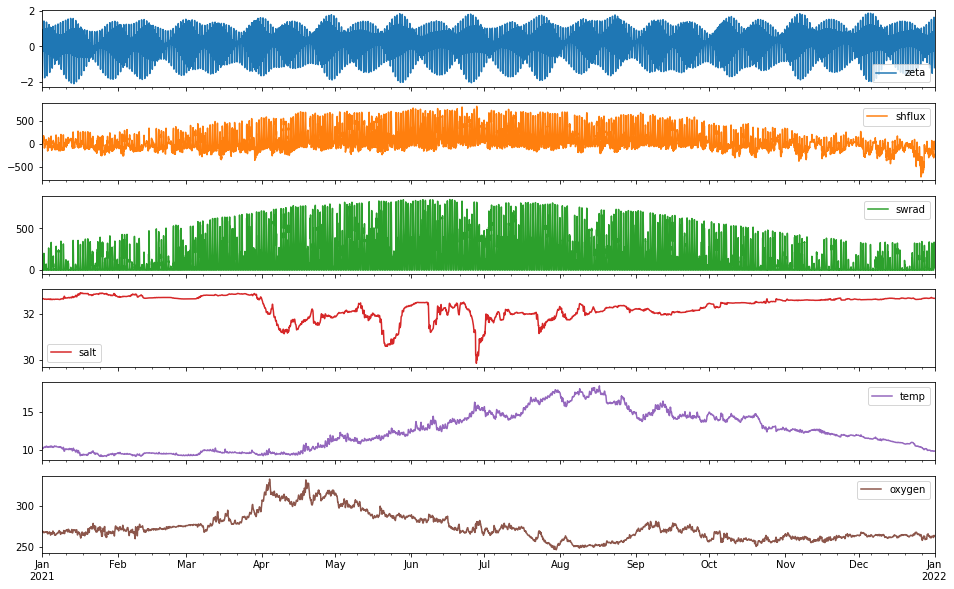

In [45]:
# Modified version of Parker's code; key features:
#   renamed Parker's T as 'Tpm' to avoid collisions

ds = xr.load_dataset(roms_datafile)
ot = ds.ocean_time.values
ot_dt = pd.to_datetime(ot)
t = (ot_dt - ot_dt[0]).total_seconds().to_numpy()
Tpm = t/86400 # time in days from start

print('time step of mooring'.center(60,'-'))
print(t[1])
print('time limits'.center(60,'-'))
print('start ' + str(ot_dt[0]))
print('end   ' + str(ot_dt[-1]))
print('info'.center(60,'-'))

VN_list = []
for vn in ds.data_vars:
    if not (vn == 'z_rho' or vn == 'z_w'):
        vnlj = vn.ljust(20, ' ')
        print('%s ( %s ) %s' % (vnlj, ds[vn].long_name, ds[vn].shape))
        VN_list.append(vn)
    
# populate lists of variables to plot
vn2_list = ['zeta']
if 'shflux' in VN_list:
    vn2_list += ['shflux', 'swrad']
vn3_list = []
if 'salt' in VN_list:
    vn3_list += ['salt', 'temp']
if 'oxygen' in VN_list:
    vn3_list += ['oxygen']

# plot time series using a pandas DataFrame
df = pd.DataFrame(index=ot)
for vn in vn2_list:
    df[vn] = ds[vn].values
for vn in vn3_list:
    # the -1 means surface values (order 0...-1 is from seafloor to surface)
    df[vn] = ds[vn][:, -1].values

plt.close('all')
df.plot(subplots=True, figsize=(16,10))
plt.show()

### Parker's chart code

Compressed a bit for space. Modified version is used above to produce those charts. 


```
"""
Stand-alone code to plot a user-specified mooring extraction.
"""
from pathlib import Path
moor_fn = Path('...etcetera....nc')
import xarray as xr, matplotlib.pyplot as plt, pandas as pd, numpy as np

# load everything using xarray
ds = xr.load_dataset(moor_fn)
ot = ds.ocean_time.values
ot_dt = pd.to_datetime(ot)
t = (ot_dt - ot_dt[0]).total_seconds().to_numpy()
T = t/86400 # time in days from start
print('time step of mooring'.center(60,'-'))
print(t[1])
print('time limits'.center(60,'-'))
print('start ' + str(ot_dt[0]))
print('end   ' + str(ot_dt[-1]))
print('info'.center(60,'-'))
VN_list = []
for vn in ds.data_vars:
    print('%s %s' % (vn, ds[vn].shape))
    VN_list.append(vn)
    
# populate lists of variables to plot
vn2_list = ['zeta']
if 'shflux' in VN_list:
    vn2_list += ['shflux', 'swrad']
vn3_list = []
if 'salt' in VN_list:
    vn3_list += ['salt', 'temp']
if 'oxygen' in VN_list:
    vn3_list += ['oxygen']

# plot time series using a pandas DataFrame
df = pd.DataFrame(index=ot)
for vn in vn2_list:
    df[vn] = ds[vn].values
for vn in vn3_list:
    # the -1 means surface values
    df[vn] = ds[vn][:, -1].values

plt.close('all')
df.plot(subplots=True, figsize=(16,10))
plt.show()
```